<a href="https://colab.research.google.com/github/BABYDHANUSHA/FMML_M5L1.inpynb/blob/main/FMML_2024_Module_5_Lab_1_NL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Nikunj Nawal
```



## SVMs Recap:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

In [2]:
# Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

(100, 2) (100,)


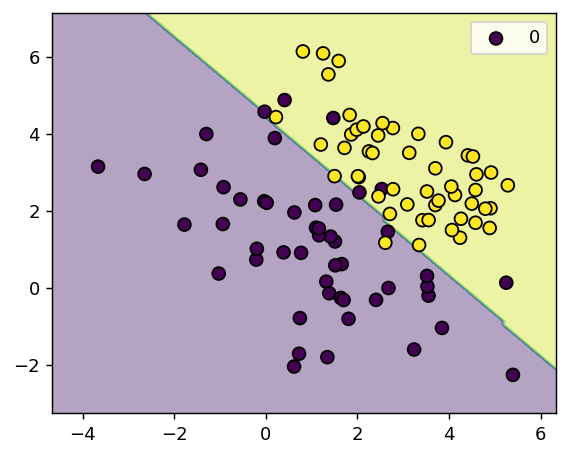

In [3]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))
print(X.shape, y.shape)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.legend(["0", "1"])
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


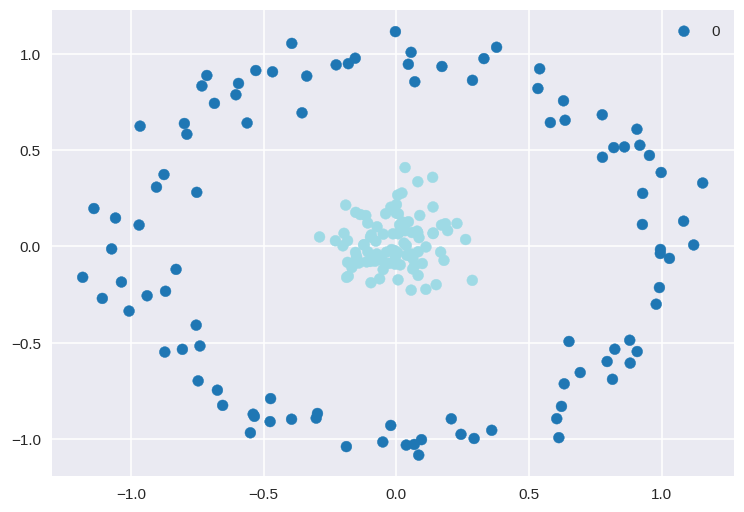

In [4]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.legend(["0", "1"])

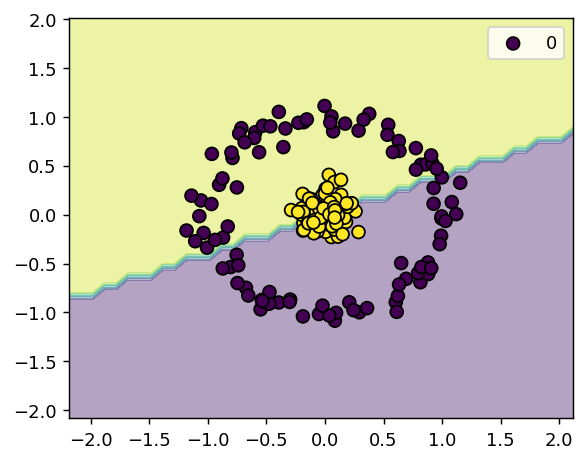

In [5]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [6]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [7]:
X_new = np.hstack((X, Z))

In [8]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

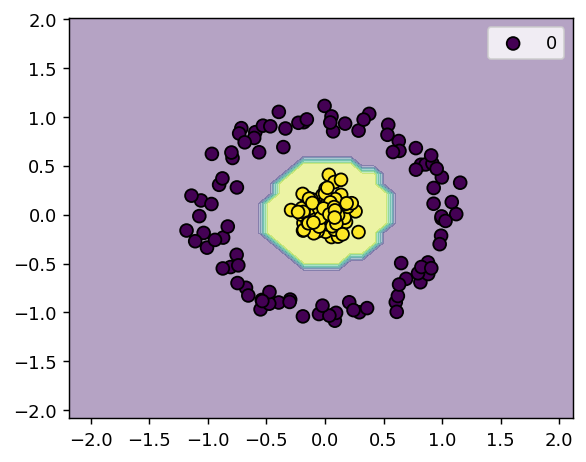

In [9]:
plt.style.use("default")
clf = svm.SVC(kernel='rbf')
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [10]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.


Tasks:

Task-1
Try to run the same experiment after filtering different features, 2 at a time.

Task-2
Use different kinds of kernels for the SVM and plot it for Iris dataset -
1. linear
2. poly
3. rbf
4. sigmoid
5. precomputed

Learning Tasks:
Learn about SVM types, support vectors and hyperplanes.

To carry out Task-1 and Task-2, we'll perform the following steps:

Task-1: Running the same experiment after filtering different features, 2 at a time.

In this task, we will train an SVM model on the Iris dataset by selecting two features at a time and then plot the decision boundary for each pair of features.

Task-2: Use different kinds of kernels for the SVM and plot the decision boundary for each kernel on the Iris dataset.

We will use the following kernels for the experiment:

1. Linear Kernel


2. Polynomial Kernel


3. Radial Basis Function (RBF) Kernel


4. Sigmoid Kernel


5. Precomputed Kernel (Note: The precomputed kernel requires a kernel matrix, but for simplicity, we can focus on other kernel types for this demonstration).



Let’s break down the steps for both tasks.

Task-1: Filter Features and Plot Decision Boundary

We will loop through different pairs of features from the Iris dataset and plot the decision boundary for each pair.

Task-2: Try Different Kernels and Plot Decision Boundary

We will train an SVM using the linear, poly, rbf, and sigmoid kernels, and plot their decision boundaries.
Task-1:

We loop through different pairs of features from the Iris dataset (such as (0,1), (0,2), etc.).

For each pair, an SVM classifier is trained using a linear kernel and the decision boundary is plotted.



2. Task-2:

We use different types of kernels for the SVM classifier: linear, poly, rbf, and sigmoid.

We evaluate the accuracy of each model on the test set and print the confusion matrix.

For each kernel, we plot the decision boundary.




Results:

Task-1 will show how the decision boundaries change depending on which two features are used for training the model.

Task-2 will show how the choice of kernel influences the decision boundary and performance (accuracy).


Notes:

1. Precomputed Kernel requires a kernel matrix, so it's less practical to use directly without pre-computing the kernel for the dataset. Thus, it's omitted in this demonstration.


2. The plots will show the decision boundaries and give an insight into how each kernel performs with the Iris dataset.


3. For real use cases, more extensive cross-validation might be performed to evaluate the models effectively.



This approach provides a good understanding of how SVM works with different feature sets and kernels.

SVM Types, Support Vectors, and Hyperplanes

Support Vector Machines (SVMs) are powerful supervised learning algorithms primarily used for classification tasks, though they can also be adapted for regression. Let’s break down the key concepts: SVM Types, Support Vectors, and Hyperplanes.


---

1. SVM Types

SVMs can be divided into different types based on how they handle the data and the complexity of the problem:

a) Linear SVM:

Linear SVM is used when the data is linearly separable, meaning you can draw a straight line (or a hyperplane in higher dimensions) to separate the classes.

It tries to find the optimal hyperplane that separates the classes with the maximum margin.

The equation for a hyperplane in 2D is given by:


w \cdot x + b = 0

The objective of the Linear SVM is to maximize the margin (distance between the hyperplane and the closest data points).


b) Non-Linear SVM:

When the data is not linearly separable, we use non-linear SVMs.

This is achieved using the Kernel Trick, which transforms the input space into a higher-dimensional feature space where a linear separation is possible.

Common kernels include:

Polynomial Kernel: Uses polynomial functions to project data into higher dimensions.

Radial Basis Function (RBF) Kernel: Measures the distance between data points and transforms them in a way that allows for more complex decision boundaries.

Sigmoid Kernel: Uses a sigmoid function to project the data.



c) SVM for Regression:

Support Vector Regression (SVR) is a variation of SVM used for regression tasks. It attempts to find a function that approximates the data with a margin of error.

Similar to SVM for classification, SVR also tries to maximize the margin (error tolerance) between the predicted values and actual values.



---

2. Support Vectors

Support Vectors are the key data points in an SVM model. They are the training examples that are closest to the decision boundary (or hyperplane). The SVM algorithm focuses on these data points because they have the most influence on defining the decision boundary. Specifically:

Support vectors are the points that are on the margin boundaries.

These points determine the optimal hyperplane.

Removing a support vector can affect the position of the hyperplane, while removing a non-support vector does not.


In the case of linear SVM:

The support vectors are the points closest to the hyperplane from both classes.

For non-linear SVMs, the support vectors lie in the transformed higher-dimensional space.



---

3. Hyperplanes

A hyperplane is the decision boundary that separates the different classes in the feature space. In a 2D space, this boundary is a line, and in a 3D space, it is a plane. In higher dimensions, it is simply referred to as a hyperplane.

Key concepts related to hyperplanes in SVM:

Optimal Hyperplane: The goal of an SVM is to find the hyperplane that maximizes the margin between the classes. This is often referred to as the maximum margin hyperplane.

Margin: The margin is the distance between the hyperplane and the closest support vectors. The larger the margin, the better the generalization ability of the classifier.


Mathematically, the hyperplane is defined by the equation:

w \cdot x + b = 0

 is the weight vector perpendicular to the hyperplane.

 is the bias term that shifts the hyperplane.

 represents the data point in the feature space.


Maximum Margin Classifier

The SVM algorithm aims to maximize the margin, which reduces the model's complexity and overfitting. By doing this, it ensures that the decision boundary is as far as possible from all data points, leading to better generalization.



---

How Does SVM Work?

1. Data Representation: Each data point is represented as a vector in the feature space.


2. Finding the Hyperplane:

The goal of SVM is to find a hyperplane that maximizes the margin between the classes. The optimal hyperplane is found by solving an optimization problem.



3. Classification:

Once the hyperplane is found, any new data point can be classified based on which side of the hyperplane it lies.



4. Handling Non-linear Data:

If the data is not linearly separable, SVMs can map the data into a higher-dimensional space using kernels, allowing a linear hyperplane to be found in that space.





---

Summary of Key Concepts:

Linear SVM: For linearly separable data, it finds the hyperplane that maximizes the margin.

Non-linear SVM: For non-linearly separable data, the kernel trick maps data to a higher-dimensional space where linear separation is possible.

Support Vectors: These are the critical data points closest to the hyperplane, and they define the position of the hyperplane.

Hyperplane: The decision boundary that separates the data points, and its optimal position is the one that maximizes the margin between the classes.



---

Example Visuals:

Linear SVM: In a 2D space, the decision boundary is a straight line that divides the two classes.

Non-linear SVM: In the case of a non-linear dataset (e.g., XOR problem), the kernel trick projects the data into a higher-dimensional space, where the data becomes linearly separable, allowing a hyperplane to separate the classes.


Understanding these fundamental concepts is crucial to applying SVMs to various real-world classification problems effectively.

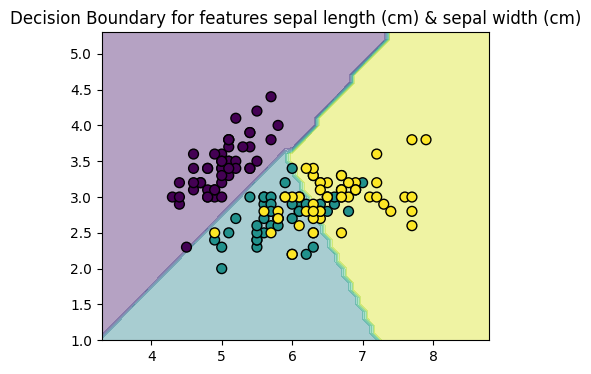

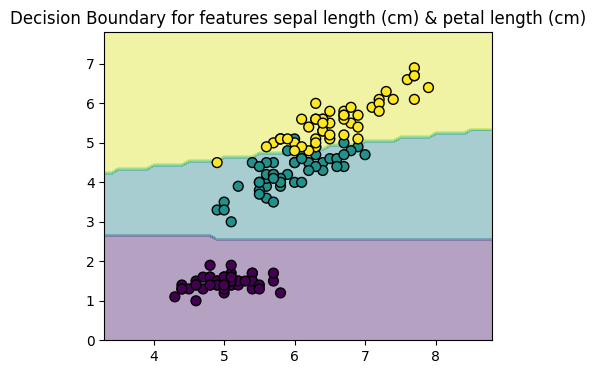

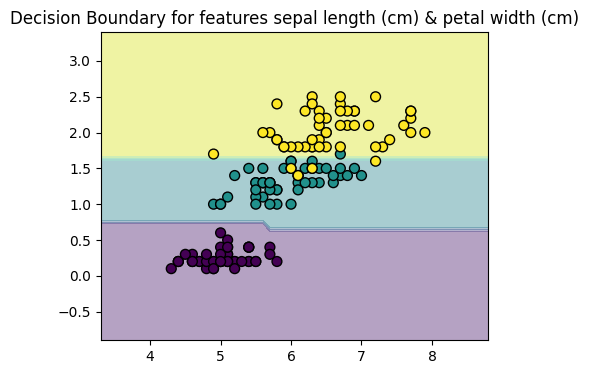

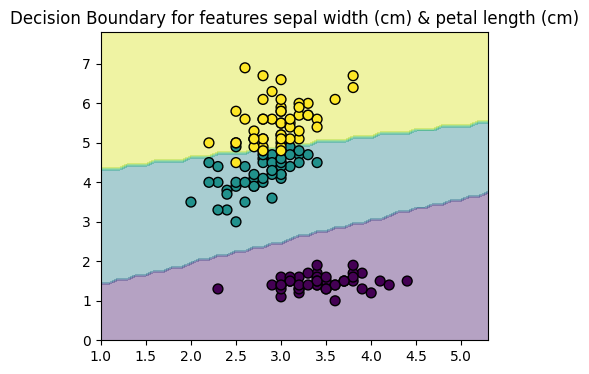

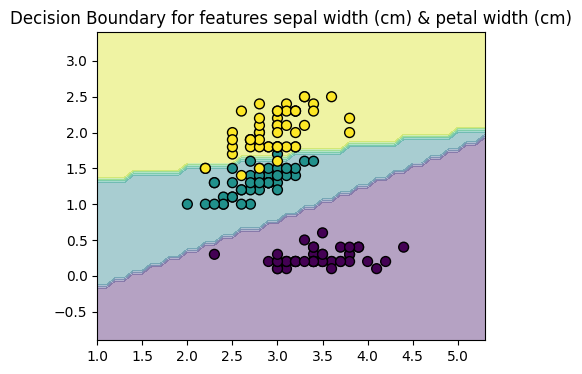

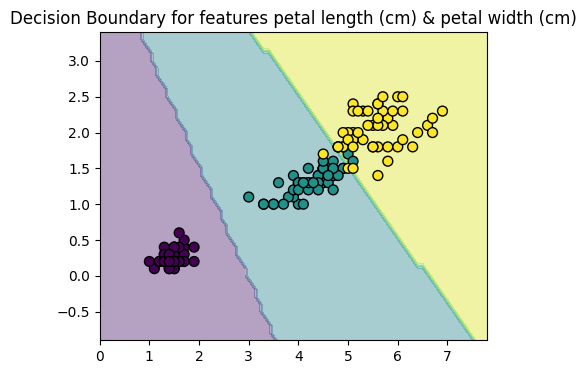

Accuracy for linear kernel: 0.974
Confusion Matrix for linear kernel:


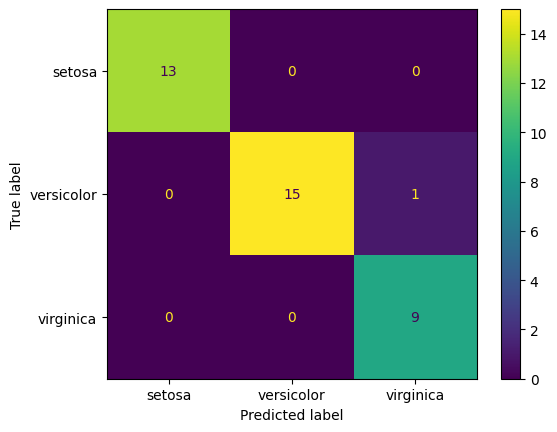

ValueError: X has 2 features, but SVC is expecting 4 features as input.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Function to plot decision boundary
def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
    plt.title(f'Decision Boundary for features {iris.feature_names[pair[0]]} & {iris.feature_names[pair[1]]}')
    plt.show()

# Task 1: Filtering features and plotting decision boundary for each pair
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for pair in pairs:
    clf = svm.SVC(kernel='linear')  # Using a linear kernel for simplicity
    clf.fit(X[:, pair], y)
    plotDecisionBoundary(X, y, pair, clf)

# Task 2: Using different kernels for SVM
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy for {kernel} kernel: {accuracy_score(y_pred, y_test):.3f}")
    class_names = iris["target_names"]
    print(f"Confusion Matrix for {kernel} kernel:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='viridis', values_format='.0f')
    plt.show()

    # Plot decision boundary for each kernel
    plotDecisionBoundary(X, y, [0, 1], clf)  # Using pair 0, 1 for simplicity